In [1]:
import sys
import csv
from sklearn import tree
from sklearn import preprocessing
import matplotlib
import graphviz
import numpy as np

In [2]:
szDatasetPath = 'breast_cancer.csv'

'''
Read the data from the csv file
listColNames[j] stores the jth column name
listData[i][:-1] are the features of the ith example
listData[i][-1] is the target value of the ith example
'''
listColNames = [] # The list of column names
listData = [] # The list of feature vectors of all the examples
nRow = 0
with open(szDatasetPath) as csvFile:
    csvReader = csv.reader(csvFile, delimiter=',')
    for row in csvReader:
        if 0 == nRow:
            listColNames = row
        else:
            listData.append(row)
        nRow += 1

'''
Scan the data and store the unique values of each column.
listColUniqueVals[j] stores a list of unique values of the jth column
'''
listColUniqueVals = [[] for i in range(len(listColNames))]
for example in listData:
    for i in range(len(example)):
        if example[i] not in listColUniqueVals[i]:
            listColUniqueVals[i].append(example[i])


In [3]:
listColNames

['age',
 'menopause',
 'tumor-size',
 'inv-nodes',
 'node-caps',
 'deg-malig',
 'breast',
 'breast-quad',
 'irradiat',
 'class']

In [ ]:
listColUniqueVals

In [ ]:
listData

In [4]:
clf = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy')
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [26]:
#Calculate entropy of an array
def entropy(labels):
    prob_dict = {x:labels.count(x)/len(labels) for x in labels}
    probs = np.array(list(prob_dict.values()))

    return - probs.dot(np.log2(probs))

In [27]:
#Label encoder to use when encoding features and labels
le = preprocessing.LabelEncoder()

In [28]:
#Encode the label array
classCol = [row[-1] for row in listData]
classColEncoded = le.fit_transform(classCol)

In [29]:
#Iterate through all features
for i in range(0,len(listColNames)-1):
    #Create a feature array, then encode it for decision tree
    featureCol = [row[i] for row in listData]
    featureCol = le.fit_transform(featureCol)
    
    #Print out feature values and feature names, for debug
    print(featureCol)
    print(listColNames[i])
    
    #Since the encoded features are ints like 0,1,2,3,4,5, then we separate the data by using 0.5,1.5,2.5,3.5,etc
    for i in range(len(listColUniqueVals[i])):
        i2= i+0.5
        
        #Label arrays of 2 parts of the separated data, will be used to calculate entropy
        less = []
        more = []
        for x in range(len(featureCol)):
            if(featureCol[x]<i2):
                less.append(classColEncoded[x])
            elif(featureCol[x]>i2):
                more.append(classColEncoded[x])
        
        #Print entropy, for debug
        print("less than entropy " + str(i2) + ": "+str(entropy(less)))
        print("more than entropy " + str(i2) + ": "+str(entropy(more)))
        
        #Make a decision tree model
    print()

[1 2 2 4 2 4 3 4 2 2 2 3 4 3 2 4 2 3 4 3 3 4 1 3 3 2 3 4 2 4 3 3 3 3 3 1 3
 3 2 2 3 4 4 2 3 3 2 3 2 2 3 1 3 5 5 5 3 3 4 4 2 2 3 0 2 2 2 3 3 4 4 2 4 3
 1 3 3 1 3 2 3 4 4 3 2 3 4 5 3 2 1 3 3 4 3 2 4 4 2 1 2 3 3 2 2 2 2 1 2 4 3
 3 2 2 2 3 1 2 1 4 4 3 3 3 4 5 1 1 3 2 2 2 2 3 4 1 1 2 1 2 3 3 4 2 4 2 4 3
 1 3 3 4 3 4 1 4 3 3 3 2 2 2 4 4 4 2 2 2 3 2 1 1 4 3 3 2 2 4 3 2 2 2 2 3 3
 2 3 4 2 3 2 2 3 1 3 3 3 2 3 3 4 3 2 3 3 1 3 3 3 2 2 3 2 3 4 2 3 2 4 1 2 1
 4 4 1 2 2 3 4 4 3 2 1 5 4 3 2 2 1 2 4 2 3 3 2 1 1 3 4 1 2 2 1 4 2 2 2 2 3
 3 4 2 4 3 3 1 2 4 1 2 3 3 2 4 4 2 1 4 3 3 3 1 1 4 2 3]
age
less than entropy 0.5: -0.0
more than entropy 0.5: 0.8791357668533336
less than entropy 1.5: 0.9740248644357521
more than entropy 1.5: 0.8569784970622595
less than entropy 2.5: 0.9156487708004133
more than entropy 2.5: 0.8420956603976348
less than entropy 3.5: 0.8818383667221814
more than entropy 3.5: 0.863120568566631
less than entropy 4.5: 0.8812908992306927
more than entropy 4.5: 0.6500224216483541
less than 

In [45]:
ageCol = [row[0] for row in listData]
ageCol = le.fit_transform(ageCol)
print(entropy(classCol))
for i in range(len(listColUniqueVals[0])):
    i2= i+0.5
    less = []
    more = []
    for x in range(len(ageCol)):
        if(ageCol[x]<i2):
            less.append(classColEncoded[x])
        elif(ageCol[x]>i2):
            more.append(classColEncoded[x])
    print("less than entropy " + str(i2) + ": "+str(entropy(less)))
    print("more than entropy " + str(i2) + ": "+str(entropy(more)))
    
    

0.8778446951746506
less than entropy 0.5: -0.0
more than entropy 0.5: 0.8791357668533336
less than entropy 1.5: 0.9740248644357521
more than entropy 1.5: 0.8569784970622595
less than entropy 2.5: 0.9156487708004133
more than entropy 2.5: 0.8420956603976348
less than entropy 3.5: 0.8818383667221814
more than entropy 3.5: 0.863120568566631
less than entropy 4.5: 0.8812908992306927
more than entropy 4.5: 0.6500224216483541
less than entropy 5.5: 0.8778446951746506
more than entropy 5.5: -0.0


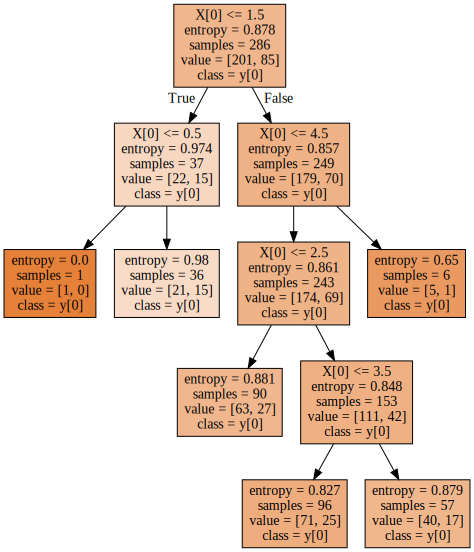

In [52]:
clf2 = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf2.fit(ageCol.reshape(-1,1),classColEncoded)
dot_data = tree.export_graphviz(clf2, out_file=None,filled=True, class_names=True)
graph = graphviz.Source(dot_data)
graph